Necessary packages:

In [1435]:
import glob
import os
import warnings


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pydicom
from pydicom.data import get_testdata_files
from sklearn.model_selection import train_test_split

from IPython.display import Markdown, display

 # Import functions from the module
import importlib
import help_files._0_definitions 
import  help_files._1_visuals_script
# import  help_files._01_load_data
 # Reload the module to apply the changes to the script
importlib.reload(help_files._0_definitions)
importlib.reload(help_files._1_visuals_script)
# importlib.reload(help_files._01_load_data)
import  help_files._1_visuals_script  as pauls_vs
# Group by 'condition', 'level', and 'severity' and count occurrences
from help_files._0_definitions import count_severity_by_condition_level 
# Define the path
from pathlib import Path

pd.set_option("display.width", 1000)  # Set a large width to prevent line wrapping
 

In [1436]:
### In definitions are all the functions that are used in the notebook and globals
with open("help_files/_0_definitions.py") as file:
    exec(file.read())

In [1437]:
# Load the data from _01_load_data
file_names = ["X_train.csv", "X_train_coor.csv", "X_train_des.csv"]
dataframes = [pd.read_csv(data_path_vor / file_name) for file_name in file_names]
X_train, X_train_coor, X_train_des = dataframes

### X_train manipulation

In [1438]:
X_train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [1439]:
# Summary statistics of the dataframe
summary = X_train.describe(include='all')

# Information about the dataframe
info = X_train.info()

# Display the summary and info
print(summary)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null   object
 11  righ

In [1440]:
X_train.dtypes

study_id                                   int64
spinal_canal_stenosis_l1_l2               object
spinal_canal_stenosis_l2_l3               object
spinal_canal_stenosis_l3_l4               object
spinal_canal_stenosis_l4_l5               object
spinal_canal_stenosis_l5_s1               object
left_neural_foraminal_narrowing_l1_l2     object
left_neural_foraminal_narrowing_l2_l3     object
left_neural_foraminal_narrowing_l3_l4     object
left_neural_foraminal_narrowing_l4_l5     object
left_neural_foraminal_narrowing_l5_s1     object
right_neural_foraminal_narrowing_l1_l2    object
right_neural_foraminal_narrowing_l2_l3    object
right_neural_foraminal_narrowing_l3_l4    object
right_neural_foraminal_narrowing_l4_l5    object
right_neural_foraminal_narrowing_l5_s1    object
left_subarticular_stenosis_l1_l2          object
left_subarticular_stenosis_l2_l3          object
left_subarticular_stenosis_l3_l4          object
left_subarticular_stenosis_l4_l5          object
left_subarticular_st

In [1441]:
# List of columns to iterate through: 
columns_to_iterate = [
    'spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
    'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2',
    'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4', 'left_neural_foraminal_narrowing_l4_l5',
    'left_neural_foraminal_narrowing_l5_s1', 'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3',
    'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5', 'right_neural_foraminal_narrowing_l5_s1',
    'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4',
    'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
    'right_subarticular_stenosis_l2_l3', 'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5',
    'right_subarticular_stenosis_l5_s1'
]


# Example operation: Fill missing values with 'Unknown'
for column in columns_to_iterate:
    X_train[column] = X_train[column].map({'Normal/Mild': 1, 'Moderate': 2, 'Severe': 3})

X_train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4646740,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0
2,7143189,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,8785691,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,10728036,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
1971,4283570761,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1972,4284048608,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0
1973,4287160193,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0


Disribution of different damages in spine

In [1442]:
# Create an empty list to store the distribution data
distribution_data = []

# Calculate the distribution for each column
for column in columns_to_iterate:
    counts = X_train[column].value_counts().sort_index()
    total_counts = counts.sum()
    distribution_data.append({
        'Condition': column,
        'Normal/Mild': counts.get(1.0, 0),
        'Moderate': counts.get(2.0, 0),
        'Severe': counts.get(3.0, 0)
    })
    distribution_data[-1]['Normal/Mild (%)'] = (counts.get(1.0, 0) / total_counts) * 100
    distribution_data[-1]['Moderate (%)'] = (counts.get(2.0, 0) / total_counts) * 100
    distribution_data[-1]['Severe (%)'] = (counts.get(3.0, 0) / total_counts) * 100

# Convert the list to a DataFrame
distribution_df = pd.DataFrame(distribution_data)

# Display the distribution DataFrame
print(distribution_df)

 


                                 Condition  Normal/Mild  Moderate  Severe  Normal/Mild (%)  Moderate (%)  Severe (%)
0              spinal_canal_stenosis_l1_l2         1886        67      21        95.542047      3.394124    1.063830
1              spinal_canal_stenosis_l2_l3         1770       151      53        89.665653      7.649443    2.684904
2              spinal_canal_stenosis_l3_l4         1622       230     122        82.168186     11.651469    6.180344
3              spinal_canal_stenosis_l4_l5         1482       237     255        75.075988     12.006079   12.917933
4              spinal_canal_stenosis_l5_s1         1904        51      19        96.453901      2.583587    0.962513
5    left_neural_foraminal_narrowing_l1_l2         1908        63       2        96.705525      3.193107    0.101368
6    left_neural_foraminal_narrowing_l2_l3         1791       171      11        90.775469      8.667005    0.557527
7    left_neural_foraminal_narrowing_l3_l4         1522       41

In [1443]:
X_train_des

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
...,...,...,...
6289,4287160193,1507070277,Sagittal T2/STIR
6290,4287160193,1820446240,Axial T2
6291,4290709089,3274612423,Sagittal T2/STIR
6292,4290709089,3390218084,Axial T2


In [1444]:
## reshaping the data from wide to long
reshape_list = ['spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4', 'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2', 'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4', 'left_neural_foraminal_narrowing_l4_l5', 'left_neural_foraminal_narrowing_l5_s1', 'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3', 'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5', 'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2', 'right_subarticular_stenosis_l2_l3', 'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5', 'right_subarticular_stenosis_l5_s1']  
# Assuming df is your DataFrame
reshaped_train = pd.melt(X_train, 
                  id_vars=["study_id"],  # Keep study_id as is
                  var_name="categorie",  # New column for the condition names
                  value_name="severity")   # New column for the values

# Display the reshaped DataFrame
# Ensure the file is not open in another program and you have write permissions
# reshaped_train.to_csv(path / "starfor_sorting_new.csv",  index=False)
 
 
X_train = reshaped_train
X_train = X_train.sort_values(by=['study_id', 'categorie'], ignore_index=True)
X_train.head()

,study_id,categorie,severity
0,4003253,left_neural_foraminal_narrowing_l1_l2,1.0
1,4003253,left_neural_foraminal_narrowing_l2_l3,1.0
2,4003253,left_neural_foraminal_narrowing_l3_l4,1.0
3,4003253,left_neural_foraminal_narrowing_l4_l5,2.0
4,4003253,left_neural_foraminal_narrowing_l5_s1,1.0


In [1445]:
# Split the string into two parts: 'spinal_canal_stenosis' and 'l1_l2'
split_columns = X_train['categorie'].str.rsplit('_', n=2)
# Combine the first part as 'condition' and the last two parts as 'level'
X_train['condition'] = split_columns.str[0]
X_train['level'] = split_columns.str[1] + '_' + split_columns.str[2]

X_train 

,study_id,categorie,severity,condition,level
0,4003253,left_neural_foraminal_narrowing_l1_l2,1.0,left_neural_foraminal_narrowing,l1_l2
1,4003253,left_neural_foraminal_narrowing_l2_l3,1.0,left_neural_foraminal_narrowing,l2_l3
2,4003253,left_neural_foraminal_narrowing_l3_l4,1.0,left_neural_foraminal_narrowing,l3_l4
3,4003253,left_neural_foraminal_narrowing_l4_l5,2.0,left_neural_foraminal_narrowing,l4_l5
4,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left_neural_foraminal_narrowing,l5_s1
...,...,...,...,...,...
49370,4290709089,spinal_canal_stenosis_l1_l2,1.0,spinal_canal_stenosis,l1_l2
49371,4290709089,spinal_canal_stenosis_l2_l3,1.0,spinal_canal_stenosis,l2_l3
49372,4290709089,spinal_canal_stenosis_l3_l4,1.0,spinal_canal_stenosis,l3_l4
49373,4290709089,spinal_canal_stenosis_l4_l5,1.0,spinal_canal_stenosis,l4_l5


In [1446]:
## adjusting srtings: disenabling the _ and making all lower case
X_train['condition'] = X_train['condition'].str.replace('_', ' ')
X_train['level'] = X_train['level'].str.replace('_', '/')


X_train_coor['condition'] = X_train_coor['condition'].str.lower()
X_train_coor['level'] = X_train_coor['level'].str.lower()
X_train.head()

,study_id,categorie,severity,condition,level
0,4003253,left_neural_foraminal_narrowing_l1_l2,1.0,left neural foraminal narrowing,l1/l2
1,4003253,left_neural_foraminal_narrowing_l2_l3,1.0,left neural foraminal narrowing,l2/l3
2,4003253,left_neural_foraminal_narrowing_l3_l4,1.0,left neural foraminal narrowing,l3/l4
3,4003253,left_neural_foraminal_narrowing_l4_l5,2.0,left neural foraminal narrowing,l4/l5
4,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1


### Select which kind of damage

In [1447]:
# keep only left neural foraminal narrowing l4/l5
# Filter the DataFrame to keep only rows where the condition is either left_subarticular_stenosis_l4_l5 or right_subarticular_stenosis_l4_l5
filtered_df = X_train[(X_train['condition'].str.contains('left neural foraminal narrowing')) & (X_train['level'] == 'l5/s1')]
print(filtered_df)

X_train = filtered_df


         study_id                              categorie  severity                        condition  level
4         4003253  left_neural_foraminal_narrowing_l5_s1       1.0  left neural foraminal narrowing  l5/s1
29        4646740  left_neural_foraminal_narrowing_l5_s1       2.0  left neural foraminal narrowing  l5/s1
54        7143189  left_neural_foraminal_narrowing_l5_s1       1.0  left neural foraminal narrowing  l5/s1
79        8785691  left_neural_foraminal_narrowing_l5_s1       2.0  left neural foraminal narrowing  l5/s1
104      10728036  left_neural_foraminal_narrowing_l5_s1       1.0  left neural foraminal narrowing  l5/s1
...           ...                                    ...       ...                              ...    ...
49254  4282019580  left_neural_foraminal_narrowing_l5_s1       2.0  left neural foraminal narrowing  l5/s1
49279  4283570761  left_neural_foraminal_narrowing_l5_s1       1.0  left neural foraminal narrowing  l5/s1
49304  4284048608  left_neural_forami

In [1448]:
X_train 

,study_id,categorie,severity,condition,level
4,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1
29,4646740,left_neural_foraminal_narrowing_l5_s1,2.0,left neural foraminal narrowing,l5/s1
54,7143189,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1
79,8785691,left_neural_foraminal_narrowing_l5_s1,2.0,left neural foraminal narrowing,l5/s1
104,10728036,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1
...,...,...,...,...,...
49254,4282019580,left_neural_foraminal_narrowing_l5_s1,2.0,left neural foraminal narrowing,l5/s1
49279,4283570761,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1
49304,4284048608,left_neural_foraminal_narrowing_l5_s1,3.0,left neural foraminal narrowing,l5/s1
49329,4287160193,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1


In [1449]:
# Group by 'categorie' and 'condition', then count the occurrences of each severity level
severity_counts = X_train.groupby(['categorie', 'condition'])['severity'].value_counts().unstack(fill_value=0)
# Display the result
print(severity_counts)



severity                                                                1.0  2.0  3.0
categorie                             condition                                      
left_neural_foraminal_narrowing_l5_s1 left neural foraminal narrowing  1247  520  206


In [1450]:
unique_study_ids_train = X_train['study_id'].nunique()
unique_study_ids_train_coor = X_train_coor['study_id'].nunique()

print(f"Number of unique study_id in X_train: {unique_study_ids_train}")
print(f"Number of unique study_id in X_train_coor: {unique_study_ids_train_coor}")

Number of unique study_id in X_train: 1975
Number of unique study_id in X_train_coor: 1974


In [1451]:
 # get rid of persons with no coordinates
X_train = X_train[X_train['study_id'].isin(X_train_coor['study_id'])]

In [1452]:
unique_study_ids_train = X_train['study_id'].nunique()
unique_study_ids_train_coor = X_train_coor['study_id'].nunique()

print(f"Number of unique study_id in X_train: {unique_study_ids_train}")
print(f"Number of unique study_id in X_train_coor: {unique_study_ids_train_coor}")

Number of unique study_id in X_train: 1974
Number of unique study_id in X_train_coor: 1974


merging X_train and X_train_coor 

In [1453]:
# Perform a left join between merged_df an X_train on multiple variables
merged_df = pd.merge(X_train, X_train_coor, on=['study_id', 'condition', 'level'], how='left')
# Display the merged DataFrame

merged_df = merged_df.sort_values(by=['categorie'], ignore_index=True) 
merged_df.head()

,study_id,categorie,severity,condition,level,series_id,instance_number,x,y
0,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306
1,2881985242,left_neural_foraminal_narrowing_l5_s1,2.0,left neural foraminal narrowing,l5/s1,4.289986e+09,17.0,217.659817,236.712329
2,2880587926,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,4.166385e+09,7.0,276.849354,395.569584
3,2878059176,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.486304e+09,14.0,245.544924,320.522754
4,2876107897,left_neural_foraminal_narrowing_l5_s1,3.0,left neural foraminal narrowing,l5/s1,9.052600e+07,5.0,153.854642,228.432268


In [1454]:
# Group by 'categorie' and 'condition', then count the occurrences of each severity level
severity_counts = X_train.groupby(['categorie', 'condition'])['severity'].value_counts().unstack(fill_value=0)
# Display the result
print(severity_counts)

severity                                                                1.0  2.0  3.0
categorie                             condition                                      
left_neural_foraminal_narrowing_l5_s1 left neural foraminal narrowing  1247  520  205


some statistics of data set

In [1455]:
# Count total rows in each DataFrame before the merge
print(f"Rows in X_train: {len(X_train)}")
print(f"Rows in X_train_coor: {len(X_train_coor)}")

# Count total rows in the merged DataFrame
print(f"Rows in merged_df: {len(merged_df)}")

# Find out how many rows have missing values in columns from X_train_coor after the merge
# Assuming columns from X_train_coor start with a common prefix or are listed in a known list
columns_from_X_train_coor = [col for col in X_train_coor.columns if col not in ['study_id', 'condition', 'level']]
missing_rows = merged_df[columns_from_X_train_coor].isnull().all(axis=1).sum()

# Create a new DataFrame for study_ids with at least one row having missing values in columns from X_train_coor
missing_study_ids = merged_df[merged_df[columns_from_X_train_coor].isnull().any(axis=1)]['study_id'].unique()
missing_persons_df = merged_df[merged_df['study_id'].isin(missing_study_ids)]
missing_persons_df = missing_persons_df.sort_values(by=['study_id', 'categorie'], ignore_index=True)
 

print(f"Rows in merged_df without matching rows in X_train_coor: {missing_rows}")
print(f"Rows in merged_df with matches from X_train_coor: {len(merged_df) - missing_rows}")

Rows in X_train: 1974
Rows in X_train_coor: 48692
Rows in merged_df: 1974
Rows in merged_df without matching rows in X_train_coor: 2
Rows in merged_df with matches from X_train_coor: 1972


In [1456]:
missing_persons_df.head()

,study_id,categorie,severity,condition,level,series_id,instance_number,x,y
0,2492114990,left_neural_foraminal_narrowing_l5_s1,NaN,left neural foraminal narrowing,l5/s1,NaN,NaN,NaN,NaN
1,2780132468,left_neural_foraminal_narrowing_l5_s1,NaN,left neural foraminal narrowing,l5/s1,NaN,NaN,NaN,NaN


In [1457]:
# drop rows with missing values in columns from X_train_coor
merged_df = merged_df.dropna(subset=columns_from_X_train_coor)
display(Markdown('<span style="color:red">later on to take it back to the original shape : 48692</span>'))
merged_df

<span style="color:red">later on to take it back to the original shape : 48692</span>

,study_id,categorie,severity,condition,level,series_id,instance_number,x,y
0,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306
1,2881985242,left_neural_foraminal_narrowing_l5_s1,2.0,left neural foraminal narrowing,l5/s1,4.289986e+09,17.0,217.659817,236.712329
2,2880587926,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,4.166385e+09,7.0,276.849354,395.569584
3,2878059176,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.486304e+09,14.0,245.544924,320.522754
4,2876107897,left_neural_foraminal_narrowing_l5_s1,3.0,left neural foraminal narrowing,l5/s1,9.052600e+07,5.0,153.854642,228.432268
...,...,...,...,...,...,...,...,...,...
1969,1438760543,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,2.072465e+09,5.0,141.849493,191.536903
1970,1436167447,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.395541e+09,6.0,126.792453,194.012579
1971,1435972903,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.246798e+09,8.0,208.305343,316.122137
1972,1431195383,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.762802e+07,3.0,255.739307,359.494908


In [1458]:
# Group by 'categorie' and 'condition', then count the occurrences of each severity level
severity_counts = merged_df.groupby(['categorie', 'condition'])['severity'].value_counts().unstack(fill_value=0)
# Display the result
print(severity_counts)

severity                                                                1.0  2.0  3.0
categorie                             condition                                      
left_neural_foraminal_narrowing_l5_s1 left neural foraminal narrowing  1247  520  205


In [1459]:
merged_df

,study_id,categorie,severity,condition,level,series_id,instance_number,x,y
0,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306
1,2881985242,left_neural_foraminal_narrowing_l5_s1,2.0,left neural foraminal narrowing,l5/s1,4.289986e+09,17.0,217.659817,236.712329
2,2880587926,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,4.166385e+09,7.0,276.849354,395.569584
3,2878059176,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.486304e+09,14.0,245.544924,320.522754
4,2876107897,left_neural_foraminal_narrowing_l5_s1,3.0,left neural foraminal narrowing,l5/s1,9.052600e+07,5.0,153.854642,228.432268
...,...,...,...,...,...,...,...,...,...
1969,1438760543,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,2.072465e+09,5.0,141.849493,191.536903
1970,1436167447,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.395541e+09,6.0,126.792453,194.012579
1971,1435972903,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.246798e+09,8.0,208.305343,316.122137
1972,1431195383,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,3.762802e+07,3.0,255.739307,359.494908


Folder with images: preparing paths for merging with main data 

 define which mri type adequate for my 

In [1460]:
X_train_des.dtypes

study_id               int64
series_id              int64
series_description    object
dtype: object

In [1461]:
X_train_des = X_train_des[X_train_des['series_description'] == 'Sagittal T2/STIR']
X_train_des.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
5,4646740,3666319702,Sagittal T2/STIR
6,7143189,132939515,Sagittal T2/STIR
9,8785691,481125819,Sagittal T2/STIR
15,10728036,3491739931,Sagittal T2/STIR


Paths to images constructing data frame: two options how to do

In [1462]:
# using X_train_desÖ Ecxell table is better than taking the path from the folders 
import re

def paths_to_images(df, data_dir):
    image_paths = []
    for study_id, series_id in zip(df['study_id'], df['series_id']):
        study_dir = os.path.join(data_dir, str(study_id))
        series_dir = os.path.join(study_dir, str(series_id))
        
        # List images in the series directory
        images = os.listdir(series_dir)
        # Create full paths for each image
        image_paths.extend([os.path.join(series_dir, img) for img in images])
        
    return image_paths

image_paths = paths_to_images(X_train_des, os.path.join("data/train_images_origin"))

# Sort the image paths to ensure numerical order
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

image_paths = sorted(image_paths, key=numerical_sort)
image_paths[:75]

df_image_paths = pd.DataFrame(image_paths, columns=['image_path'])
df_image_paths.head()

,image_path
0,data/train_images_origin\4003253\702807833\1.dcm
1,data/train_images_origin\4003253\702807833\2.dcm
2,data/train_images_origin\4003253\702807833\3.dcm
3,data/train_images_origin\4003253\702807833\4.dcm
4,data/train_images_origin\4003253\702807833\5.dcm


In [1463]:
""" # brauche ich nicht Using real folders and images:  
# path to images folder and images inside the folder
import re
# Define the main directory
main_dir = "data/train_images"

def paths_to_images_2(main_dir):
    image_paths = []
    # Walk through the directory structure starting from the main directory
    for root, subdirs, files in os.walk(main_dir):
        for file in files:
            # Create the full path for each image
            print(file)
            file_path = os.path.join(root, file)
            image_paths.append(file_path)

    return image_paths

paths_to_images_2(main_dir)



################   sort path images in numerical order  
# Define the main directory
main_dir = "data/train_images"

# Get the image paths
image_paths2 = paths_to_images_2(main_dir)

# Sort the image paths to ensure numerical order
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

image_paths2 = sorted(image_paths2, key=numerical_sort)
image_paths2[:75]

df_image_paths2 = pd.DataFrame(image_paths2, columns=['image_path'])
df_image_paths2.head()
 
"""

' # brauche ich nicht Using real folders and images:  \n# path to images folder and images inside the folder\nimport re\n# Define the main directory\nmain_dir = "data/train_images"\n\ndef paths_to_images_2(main_dir):\n    image_paths = []\n    # Walk through the directory structure starting from the main directory\n    for root, subdirs, files in os.walk(main_dir):\n        for file in files:\n            # Create the full path for each image\n            print(file)\n            file_path = os.path.join(root, file)\n            image_paths.append(file_path)\n\n    return image_paths\n\npaths_to_images_2(main_dir)\n\n\n\n################   sort path images in numerical order  \n# Define the main directory\nmain_dir = "data/train_images"\n\n# Get the image paths\nimage_paths2 = paths_to_images_2(main_dir)\n\n# Sort the image paths to ensure numerical order\ndef numerical_sort(value):\n    parts = re.split(r\'(\\d+)\', value)\n    return [int(part) if part.isdigit() else part for part in

In [1464]:
df_image_paths['image_path'] = df_image_paths['image_path'].str.replace('\\', '/')
df_image_paths.head()

,image_path
0,data/train_images_origin/4003253/702807833/1.dcm
1,data/train_images_origin/4003253/702807833/2.dcm
2,data/train_images_origin/4003253/702807833/3.dcm
3,data/train_images_origin/4003253/702807833/4.dcm
4,data/train_images_origin/4003253/702807833/5.dcm


In [1465]:
# Split the path and extract the study_id: make integer type of study_id
def safe_int_conversion(x):
    try:
        return int(x)
    except OverflowError:
        return None  # or handle it in another way

df_image_paths['study_id'] = df_image_paths['image_path'].apply(lambda x: safe_int_conversion(x.split('/')[2]))
df_image_paths['study_id'] = df_image_paths['study_id'].astype(int)
df_image_paths.head(75)

,image_path,study_id
0,data/train_images_origin/4003253/702807833/1.dcm,4003253
1,data/train_images_origin/4003253/702807833/2.dcm,4003253
2,data/train_images_origin/4003253/702807833/3.dcm,4003253
3,data/train_images_origin/4003253/702807833/4.dcm,4003253
4,data/train_images_origin/4003253/702807833/5.dcm,4003253
...,...,...
70,data/train_images_origin/10728036/3491739931/7...,10728036
71,data/train_images_origin/10728036/3491739931/8...,10728036
72,data/train_images_origin/10728036/3491739931/9...,10728036
73,data/train_images_origin/10728036/3491739931/1...,10728036


In [1466]:
df_image_paths.dtypes

image_path    object
study_id       int32
dtype: object

In [1467]:
# keep only selected persons 
from help_files._0_definitions import keep_persons, study_ids_to_keep, all_persons
voraluf = keep_persons(df_image_paths, study_ids_to_keep, all_persons)
df_image_paths = voraluf
df_image_paths

,image_path,study_id
0,data/train_images_origin/4003253/702807833/1.dcm,4003253
1,data/train_images_origin/4003253/702807833/2.dcm,4003253
2,data/train_images_origin/4003253/702807833/3.dcm,4003253
3,data/train_images_origin/4003253/702807833/4.dcm,4003253
4,data/train_images_origin/4003253/702807833/5.dcm,4003253
...,...,...
33564,data/train_images_origin/4290709089/3274612423...,-4258207
33565,data/train_images_origin/4290709089/3274612423...,-4258207
33566,data/train_images_origin/4290709089/3274612423...,-4258207
33567,data/train_images_origin/4290709089/3274612423...,-4258207


Join  X_train and df_image_paths

In [1468]:
""" some checks 
df_image_paths['count'] = df_image_paths.groupby('study_id').cumcount() + 1
df_image_paths['count_per_person'] = df_image_paths.groupby('study_id')['study_id'].transform('count')
df_image_paths['mean_per_of_raws'] = df_image_paths.groupby('study_id').first()['count_per_person'].mean()
df_image_paths['first_row_flag'] = df_image_paths.groupby('study_id').cumcount().apply(lambda x: 1 if x == 0 else 0)
df_image_paths['mean_per_of_raws2'] = np.where(df_image_paths['first_row_flag'] == 1, df_image_paths['count_per_person'].mean(), np.nan)
df_image_paths.head(75)

print("at average there are 81 images per person")
"""

' some checks \ndf_image_paths[\'count\'] = df_image_paths.groupby(\'study_id\').cumcount() + 1\ndf_image_paths[\'count_per_person\'] = df_image_paths.groupby(\'study_id\')[\'study_id\'].transform(\'count\')\ndf_image_paths[\'mean_per_of_raws\'] = df_image_paths.groupby(\'study_id\').first()[\'count_per_person\'].mean()\ndf_image_paths[\'first_row_flag\'] = df_image_paths.groupby(\'study_id\').cumcount().apply(lambda x: 1 if x == 0 else 0)\ndf_image_paths[\'mean_per_of_raws2\'] = np.where(df_image_paths[\'first_row_flag\'] == 1, df_image_paths[\'count_per_person\'].mean(), np.nan)\ndf_image_paths.head(75)\n\nprint("at average there are 81 images per person")\n'

merign: 1:to many left join: df_image_paths merged to merged_df

In [1469]:
# join 1 to many: X_train and df_image_paths
df_end = merged_df.merge(df_image_paths, on='study_id', how='left')
df_end.head()


,study_id,categorie,severity,condition,level,series_id,instance_number,x,y,image_path
0,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306,data/train_images_origin/4003253/702807833/1.dcm
1,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306,data/train_images_origin/4003253/702807833/2.dcm
2,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306,data/train_images_origin/4003253/702807833/3.dcm
3,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306,data/train_images_origin/4003253/702807833/4.dcm
4,4003253,left_neural_foraminal_narrowing_l5_s1,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,11.0,197.100569,289.457306,data/train_images_origin/4003253/702807833/5.dcm


In [1470]:
# Call the function count_severity_by_condition_level for checking the count of severity by condition and level
 
print("\nMerged DataFrame:")
count_severity_by_condition_level(df_end)


Merged DataFrame:
Shape of the DataFrame: (17522, 10)
                         condition  level  severity  count
0  left neural foraminal narrowing  l5/s1       1.0   1247
1  left neural foraminal narrowing  l5/s1       2.0    520
2  left neural foraminal narrowing  l5/s1       3.0    205


,condition,level,severity,count
0,left neural foraminal narrowing,l5/s1,1.0,1247
1,left neural foraminal narrowing,l5/s1,2.0,520
2,left neural foraminal narrowing,l5/s1,3.0,205


In [1471]:
# join 1 to many: X_train and df_image_paths

df_end = df_end.drop(columns=['categorie', 'instance_number'])
df_end.shape

# Define data_path_vor
 
 
df_end.head()   

,study_id,severity,condition,level,series_id,x,y,image_path
0,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/1.dcm
1,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/2.dcm
2,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/3.dcm
3,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/4.dcm
4,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/5.dcm


In [1472]:
# Call the function count_severity_by_condition_level for checking the count of severity by condition and level
 
print("\nMerged DataFrame:")
count_severity_by_condition_level(df_end)


Merged DataFrame:
Shape of the DataFrame: (17522, 8)
                         condition  level  severity  count
0  left neural foraminal narrowing  l5/s1       1.0   1247
1  left neural foraminal narrowing  l5/s1       2.0    520
2  left neural foraminal narrowing  l5/s1       3.0    205


,condition,level,severity,count
0,left neural foraminal narrowing,l5/s1,1.0,1247
1,left neural foraminal narrowing,l5/s1,2.0,520
2,left neural foraminal narrowing,l5/s1,3.0,205


In [1473]:
before = df_end.shape[0]
# Option 1: Drop rows with NaN values in image_path
df_end = df_end.dropna(subset=['image_path'])
print(df_end[df_end['image_path'].isna()])
after = df_end.shape[0]
print(f"Number of rows dropped: {before}, after: {after}, dropped: {before - after}") 


Empty DataFrame
Columns: [study_id, severity, condition, level, series_id, x, y, image_path]
Index: []
Number of rows dropped: 17522, after: 16516, dropped: 1006


In [1474]:
print(df_end.to_string(index=False, header=True))

  study_id  severity                       condition level    series_id          x          y                                            image_path
   4003253       1.0 left neural foraminal narrowing l5/s1 1054713880.0 197.100569 289.457306      data/train_images_origin/4003253/702807833/1.dcm
   4003253       1.0 left neural foraminal narrowing l5/s1 1054713880.0 197.100569 289.457306      data/train_images_origin/4003253/702807833/2.dcm
   4003253       1.0 left neural foraminal narrowing l5/s1 1054713880.0 197.100569 289.457306      data/train_images_origin/4003253/702807833/3.dcm
   4003253       1.0 left neural foraminal narrowing l5/s1 1054713880.0 197.100569 289.457306      data/train_images_origin/4003253/702807833/4.dcm
   4003253       1.0 left neural foraminal narrowing l5/s1 1054713880.0 197.100569 289.457306      data/train_images_origin/4003253/702807833/5.dcm
   4003253       1.0 left neural foraminal narrowing l5/s1 1054713880.0 197.100569 289.457306      data/train_im

In [1475]:
# Call the function count_severity_by_condition_level for checking the count of severity by condition and level
 
print("\nMerged DataFrame:")
count_severity_by_condition_level(df_end)



Merged DataFrame:
Shape of the DataFrame: (16516, 8)
                         condition  level  severity  count
0  left neural foraminal narrowing  l5/s1       1.0    601
1  left neural foraminal narrowing  l5/s1       2.0    259
2  left neural foraminal narrowing  l5/s1       3.0    106


,condition,level,severity,count
0,left neural foraminal narrowing,l5/s1,1.0,601
1,left neural foraminal narrowing,l5/s1,2.0,259
2,left neural foraminal narrowing,l5/s1,3.0,106


In [1476]:
# Convert image_path to string if necessary
df_end['image_path'] = df_end['image_path'].astype(str)
# Print out the image_path values to inspect
print(df_end['image_path'].head())

0    data/train_images_origin/4003253/702807833/1.dcm
1    data/train_images_origin/4003253/702807833/2.dcm
2    data/train_images_origin/4003253/702807833/3.dcm
3    data/train_images_origin/4003253/702807833/4.dcm
4    data/train_images_origin/4003253/702807833/5.dcm
Name: image_path, dtype: object


In [1477]:
df_end.dtypes

study_id        int64
severity      float64
condition      object
level          object
series_id     float64
x             float64
y             float64
image_path     object
dtype: object

random sample selection


In [1478]:
from help_files._0_definitions import generate_sample 
print(full_sample)

True


In [1479]:
# Generate a sample of the DataFrame
df_end = generate_sample(df_end)

DataFrame does not contain any missing values.
No changes (16516, 8)
##########


In [1480]:
print("\nMerged DataFrame:")
count_severity_by_condition_level(df_end)


Merged DataFrame:
Shape of the DataFrame: (16516, 8)
                         condition  level  severity  count
0  left neural foraminal narrowing  l5/s1       1.0    601
1  left neural foraminal narrowing  l5/s1       2.0    259
2  left neural foraminal narrowing  l5/s1       3.0    106


,condition,level,severity,count
0,left neural foraminal narrowing,l5/s1,1.0,601
1,left neural foraminal narrowing,l5/s1,2.0,259
2,left neural foraminal narrowing,l5/s1,3.0,106


the code below only once: it trasforms the images and saves them (see _02_transform_images): however it transforms only 'Sagittal T2/STIR' pictures. But for the whole sample it were just 7 minutes

In [1481]:
# transform images: already predtransforemed
"""
with open("help_files/_02_transform_images.py") as file:
    exec(file.read())
""" 
 

'\nwith open("help_files/_02_transform_images.py") as file:\n    exec(file.read())\n'

select randomly one raw for each study_id

In [1482]:
# Randomly select one row from each study_id
random_sample_df = df_end.groupby('study_id').sample(n=2, random_state=RSEED)
# random_sample_df = df_end.groupby('study_id').sample(n=2, random_state=RSEED)
random_sample_df

,study_id,severity,condition,level,series_id,x,y,image_path
9,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/10.dcm
11,4003253,1.0,left neural foraminal narrowing,l5/s1,1.054714e+09,197.100569,289.457306,data/train_images_origin/4003253/702807833/12.dcm
6768,4646740,2.0,left neural foraminal narrowing,l5/s1,3.486248e+09,235.980844,360.313610,data/train_images_origin/4646740/3666319702/10...
6773,4646740,2.0,left neural foraminal narrowing,l5/s1,3.486248e+09,235.980844,360.313610,data/train_images_origin/4646740/3666319702/15...
6743,7143189,1.0,left neural foraminal narrowing,l5/s1,3.219733e+09,199.493128,272.418121,data/train_images_origin/7143189/132939515/2.dcm
...,...,...,...,...,...,...,...,...
12169,2139287338,2.0,left neural foraminal narrowing,l5/s1,3.848652e+09,249.671910,298.858427,data/train_images_origin/2139287338/3409037216...
12149,2139301976,2.0,left neural foraminal narrowing,l5/s1,3.709813e+09,268.050209,375.698745,data/train_images_origin/2139301976/1784857668...
12139,2139301976,2.0,left neural foraminal narrowing,l5/s1,3.709813e+09,268.050209,375.698745,data/train_images_origin/2139301976/1784857668...
12129,2141458217,3.0,left neural foraminal narrowing,l5/s1,4.987342e+08,177.230769,240.351648,data/train_images_origin/2141458217/869187184/...


In [1483]:
# Call the function count_severity_by_condition_level for checking the count of severity by condition and level
count_severity_by_condition_level(random_sample_df)

Shape of the DataFrame: (1932, 8)
                         condition  level  severity  count
0  left neural foraminal narrowing  l5/s1       1.0    601
1  left neural foraminal narrowing  l5/s1       2.0    259
2  left neural foraminal narrowing  l5/s1       3.0    106


,condition,level,severity,count
0,left neural foraminal narrowing,l5/s1,1.0,601
1,left neural foraminal narrowing,l5/s1,2.0,259
2,left neural foraminal narrowing,l5/s1,3.0,106


Number of person for each severity

In [1484]:
# Function to get random samples for each severity level
number_persons_train = 200 
def get_random_samples(df, severity, number, random_state=RSEED):
    return df[df['severity'] == severity].sample(n=number_persons_train, random_state=random_state)

# Get random samples for each severity level
random_sample_severity_1 = get_random_samples(random_sample_df, severity=1.0, number=number_persons_train)
random_sample_severity_2 = get_random_samples(random_sample_df, severity=2.0, number=number_persons_train)
random_sample_severity_3 = get_random_samples(random_sample_df, severity=3.0, number=number_persons_train)

# Combine the samples into one DataFrame
random_samples_combined = pd.concat([random_sample_severity_1, random_sample_severity_2, random_sample_severity_3])

# Display the combined random samples
random_samples_combined.head()
random_samples_combined = random_samples_combined.sort_values(by='study_id').reset_index(drop=True)
random_samples_combined.head()

,study_id,severity,condition,level,series_id,x,y,image_path
0,4646740,2.0,left neural foraminal narrowing,l5/s1,3.486248e+09,235.980844,360.313610,data/train_images_origin/4646740/3666319702/10...
1,8785691,2.0,left neural foraminal narrowing,l5/s1,1.570287e+09,189.656176,254.389937,data/train_images_origin/8785691/481125819/6.dcm
2,8785691,2.0,left neural foraminal narrowing,l5/s1,1.570287e+09,189.656176,254.389937,data/train_images_origin/8785691/481125819/1.dcm
3,13317052,3.0,left neural foraminal narrowing,l5/s1,1.539052e+09,210.574338,258.867617,data/train_images_origin/13317052/2677627096/1...
4,13317052,3.0,left neural foraminal narrowing,l5/s1,1.539052e+09,210.574338,258.867617,data/train_images_origin/13317052/2677627096/1...


In [1485]:
# prints in the wide format
df_end = random_samples_combined


# Assuming df_end is your DataFrame
print(df_end.to_string(index=False, header=True))

  study_id  severity                       condition level    series_id          x          y                                            image_path
   4646740       2.0 left neural foraminal narrowing l5/s1 3486248476.0 235.980844 360.313610    data/train_images_origin/4646740/3666319702/10.dcm
   8785691       2.0 left neural foraminal narrowing l5/s1 1570286759.0 189.656176 254.389937      data/train_images_origin/8785691/481125819/6.dcm
   8785691       2.0 left neural foraminal narrowing l5/s1 1570286759.0 189.656176 254.389937      data/train_images_origin/8785691/481125819/1.dcm
  13317052       3.0 left neural foraminal narrowing l5/s1 1539051863.0 210.574338 258.867617   data/train_images_origin/13317052/2677627096/16.dcm
  13317052       3.0 left neural foraminal narrowing l5/s1 1539051863.0 210.574338 258.867617   data/train_images_origin/13317052/2677627096/13.dcm
  29931867       2.0 left neural foraminal narrowing l5/s1 1152175603.0 159.912926 234.775510    data/train_imag

In [1486]:
df_end.dtypes
df_end['condition'] = df_end['condition'].astype('category').cat.codes

first try 

In [1487]:
df_end = random_samples_combined
 
print(df_end.head())

   study_id  severity  condition  level     series_id           x           y                                         image_path
0   4646740       2.0          0  l5/s1  3.486248e+09  235.980844  360.313610  data/train_images_origin/4646740/3666319702/10...
1   8785691       2.0          0  l5/s1  1.570287e+09  189.656176  254.389937   data/train_images_origin/8785691/481125819/6.dcm
2   8785691       2.0          0  l5/s1  1.570287e+09  189.656176  254.389937   data/train_images_origin/8785691/481125819/1.dcm
3  13317052       3.0          0  l5/s1  1.539052e+09  210.574338  258.867617  data/train_images_origin/13317052/2677627096/1...
4  13317052       3.0          0  l5/s1  1.539052e+09  210.574338  258.867617  data/train_images_origin/13317052/2677627096/1...


In [1488]:
df_end['severity'] = df_end['severity'] - 1  # Subtracting 1 from each severity level

model setting

In [1489]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, resn
import torchvision.models as models
from torchvision import transforms
import pydicom
import cv2
import pandas as pd

# Define the transform with augmentation: I already tranformed i tbfore 

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),       # Randomly rotate the image by ±10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust color properties
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class MRIDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

        # Ensure severity is in integer format
        self.data['severity'] = self.data['severity'].astype(int)

    def __getitem__(self, index):
        row = self.data.iloc[index]
        image_path = row['image_path']
        label = row['severity']  # Use severity for the label

        dicom_image = pydicom.dcmread(image_path)
        image = dicom_image.pixel_array.astype(float)
        image = (image / image.max() * 255).astype('uint8')  # Normalize

        # Convert the image to RGB if it is grayscale
        if len(image.shape) == 2:  # Grayscale
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        # Apply transformations including augmentation
        image_tensor = self.transform(image) if self.transform else torch.from_numpy(image).permute(2, 0, 1)

        return image_tensor, torch.tensor(label).long()  # Return label as tensor

    def __len__(self):
        return len(self.data)



if crossvalidation stop if validation and train goes apart

Epoch [1/10], Train Cross Entropy Loss: 1.1617, Validation Cross Entropy Loss: 1.1023
Epoch [2/10], Train Cross Entropy Loss: 1.1126, Validation Cross Entropy Loss: 1.2507
Epoch [3/10], Train Cross Entropy Loss: 1.1029, Validation Cross Entropy Loss: 1.2604
Epoch [4/10], Train Cross Entropy Loss: 1.0787, Validation Cross Entropy Loss: 1.1749
Epoch [5/10], Train Cross Entropy Loss: 1.0514, Validation Cross Entropy Loss: 1.0912
Epoch [6/10], Train Cross Entropy Loss: 1.0083, Validation Cross Entropy Loss: 1.2030
Epoch [7/10], Train Cross Entropy Loss: 1.0313, Validation Cross Entropy Loss: 1.0926
Epoch [8/10], Train Cross Entropy Loss: 0.9814, Validation Cross Entropy Loss: 1.1821
Epoch [9/10], Train Cross Entropy Loss: 0.9585, Validation Cross Entropy Loss: 1.2837
Early stopping at epoch 10 due to validation loss diverging.
Training complete!


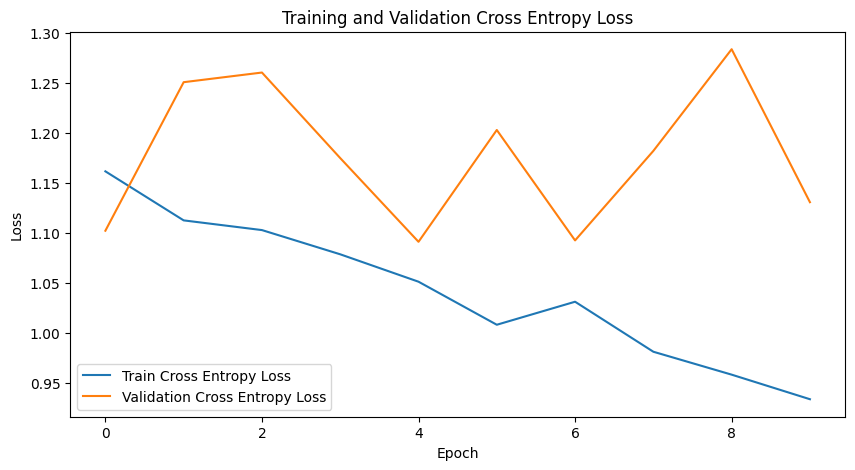

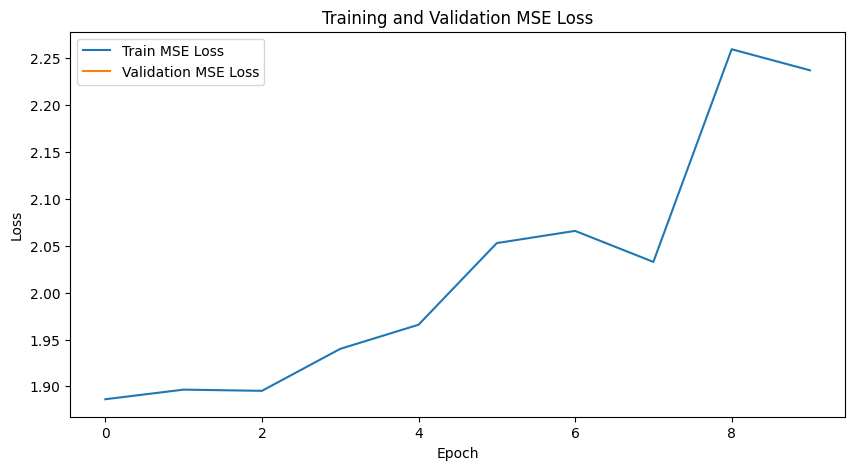

In [1490]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import models
import matplotlib.pyplot as plt

# Create the dataset
dataset = MRIDataset(data=df_end, transform=transform)

# Split the dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Load ResNet-50 and set up for classification
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = df_end['severity'].nunique()

model = models.resnet50(weights='IMAGENET1K_V1')
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

# Define loss functions and optimizer
criterion_cel = nn.CrossEntropyLoss()
criterion_mse = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10

# Lists to store loss values for plotting
train_losses_cel = []
val_losses_cel = []
train_losses_mse = []
val_losses_mse = []

# Early stopping parameters
stop_threshold = 0.2  # Threshold for validation loss to diverge from training loss
diverge_count = 0
max_diverge_count = 3  # Number of epochs validation loss is allowed to diverge

# Training and validation loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss_cel_train = 0.0
    running_loss_mse_train = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        
        # Cross Entropy Loss
        loss_cel = criterion_cel(outputs, labels)
        running_loss_cel_train += loss_cel.item()

        # MSE Loss (if applicable)
        mse_target = labels.float().unsqueeze(1).expand_as(outputs)  # Example target
        loss_mse = criterion_mse(outputs, mse_target)
        running_loss_mse_train += loss_mse.item()
        
        # Backward pass and optimization
        loss_cel.backward()
        optimizer.step()

    epoch_loss_cel_train = running_loss_cel_train / len(train_loader)
    train_losses_cel.append(epoch_loss_cel_train)
    epoch_loss_mse_train = running_loss_mse_train / len(train_loader)
    train_losses_mse.append(epoch_loss_mse_train)

    # Validation phase
    model.eval()
    running_loss_cel_val = 0.0
    running_loss_mse_val = 0.0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            # Cross Entropy Loss for validation
            loss_cel = criterion_cel(outputs, labels)
            running_loss_cel_val += loss_cel.item()
            
            # MSE Loss (if applicable)
            mse_target = labels.float().unsqueeze(1).expand_as(outputs)  # Ensure mse_target matches outputs shape
            loss_mse = criterion_mse(outputs, mse_target)
            running_loss_mse_val += loss_mse.item()

    epoch_loss_cel_val = running_loss_cel_val / len(val_loader)
    val_losses_cel.append(epoch_loss_cel_val)
    
    # Early stopping check
    if epoch_loss_cel_val > epoch_loss_cel_train * (1 + stop_threshold):
        diverge_count += 1
        if diverge_count >= max_diverge_count:
            print(f"Early stopping at epoch {epoch+1} due to validation loss diverging.")
            break
    else:
        diverge_count = 0  # Reset count if validation loss improves

    # Print epoch results
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Cross Entropy Loss: {epoch_loss_cel_train:.4f}, '
          f'Validation Cross Entropy Loss: {epoch_loss_cel_val:.4f}')

print("Training complete!")

# Plot Cross Entropy Losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses_cel, label='Train Cross Entropy Loss')
plt.plot(val_losses_cel, label='Validation Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Cross Entropy Loss')
plt.legend()
plt.show()

# Plot MSE Loss if applicable
plt.figure(figsize=(10, 5))
plt.plot(train_losses_mse, label='Train MSE Loss')
plt.plot(val_losses_mse, label='Validation MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()


In [1491]:
with corssvalidation but without stopping

SyntaxError: invalid syntax (757581990.py, line 1)

In [1434]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import models
import matplotlib.pyplot as plt

# Create the dataset
dataset = MRIDataset(data=df_end, transform=transform)

# Split the dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)  # Adjust batch size as needed
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Load ResNet-50 and set up for classification
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = df_end['severity'].nunique()  # Number of unique severities

model = models.resnet50(weights='IMAGENET1K_V1')  # Updated for latest versions
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify the final layer
model.to(device)

# Define loss functions and optimizer
criterion_cel = nn.CrossEntropyLoss()  # For classification
criterion_mse = nn.MSELoss()  # For any regression targets, if applicable
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 20

# Lists to store loss values for plotting
train_losses_cel = []
val_losses_cel = []
train_losses_mse = []
val_losses_mse = []

# Training and validation loop
for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode
    running_loss_cel_train = 0.0
    running_loss_mse_train = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        
        outputs = model(images)  # Forward pass
        
        # Calculate Cross Entropy Loss
        loss_cel = criterion_cel(outputs, labels)  # Calculate CEL
        running_loss_cel_train += loss_cel.item()  # Accumulate Cross Entropy Loss

        # Calculate MSE Loss (if applicable)
        # Define mse_target based on your regression target
        mse_target = labels.float().unsqueeze(1).expand_as(outputs)  # Ensure mse_target has the same shape as outputs
        loss_mse = criterion_mse(outputs, mse_target)
        running_loss_mse_train += loss_mse.item()  # Accumulate MSE Loss
        
        # Backward pass and optimization
        loss_cel.backward()  
        optimizer.step()  

    epoch_loss_cel_train = running_loss_cel_train / len(train_loader)
    train_losses_cel.append(epoch_loss_cel_train)
    epoch_loss_mse_train = running_loss_mse_train / len(train_loader)
    train_losses_mse.append(epoch_loss_mse_train)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    running_loss_cel_val = 0.0
    running_loss_mse_val = 0.0
    
    with torch.no_grad():  # No need to calculate gradients
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Forward pass
            
            # Calculate Cross Entropy Loss for validation
            loss_cel = criterion_cel(outputs, labels)  # Calculate CEL
            running_loss_cel_val += loss_cel.item()  # Accumulate Cross Entropy Loss
            
            # Calculate MSE Loss (if applicable)
            mse_target = labels.float().unsqueeze(1).expand_as(outputs)  # Ensure mse_target has the same shape as outputs
            loss_mse = criterion_mse(outputs, mse_target)
            running_loss_mse_val += loss_mse.item()  # Accumulate MSE Loss

    epoch_loss_cel_val = running_loss_cel_val / len(val_loader)
    val_losses_cel.append(epoch_loss_cel_val)
    # epoch_loss_mse_val = running_loss_mse_val / len(val_loader)
    # val_losses_mse.append(epoch_loss_mse_val)

    # Print epoch results
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Cross Entropy Loss: {epoch_loss_cel_train:.4f}, '
          f'Validation Cross Entropy Loss: {epoch_loss_cel_val:.4f}')
    # Uncomment to show MSE loss if used
    # print(f'Train MSE Loss: {epoch_loss_mse_train:.4f}, '
    #       f'Validation MSE Loss: {epoch_loss_mse_val:.4f}')

print("Training complete!")

# After training, plot the Cross Entropy Losses using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(train_losses_cel, label='Train Cross Entropy Loss')
plt.plot(val_losses_cel, label='Validation Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Cross Entropy Loss')
plt.legend()
plt.show()

# Uncomment to plot MSE Loss if applicable
plt.figure(figsize=(10, 5))
plt.plot(train_losses_mse, label='Train MSE Loss')
plt.plot(val_losses_mse, label='Validation MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()


Epoch [1/20], Train Cross Entropy Loss: 1.1613, Validation Cross Entropy Loss: 1.1301


KeyboardInterrupt: 

with stop function if 

Epoch [1/10], Train Cross Entropy Loss: 1.0679, Validation Cross Entropy Loss: 1.1013
Epoch [2/10], Train Cross Entropy Loss: 0.8726, Validation Cross Entropy Loss: 1.2249
Epoch [3/10], Train Cross Entropy Loss: 0.8049, Validation Cross Entropy Loss: 1.3163
Early stopping at epoch 4 due to validation loss diverging.
Training complete!


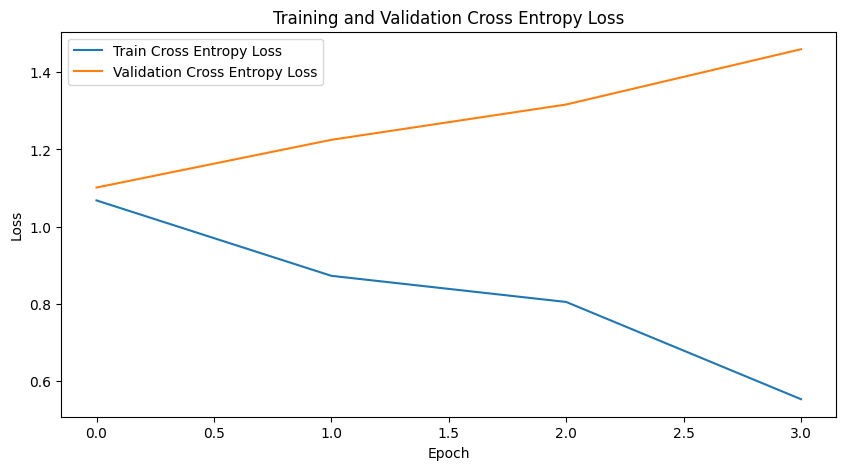

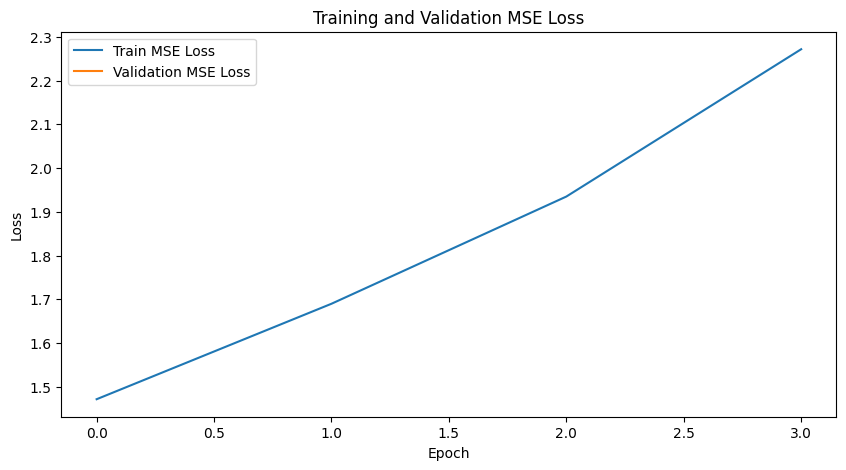